# Capital Gains Tax

Long-term capital gains (and qualified dividends) are taxed at lower rates than ordinary income.

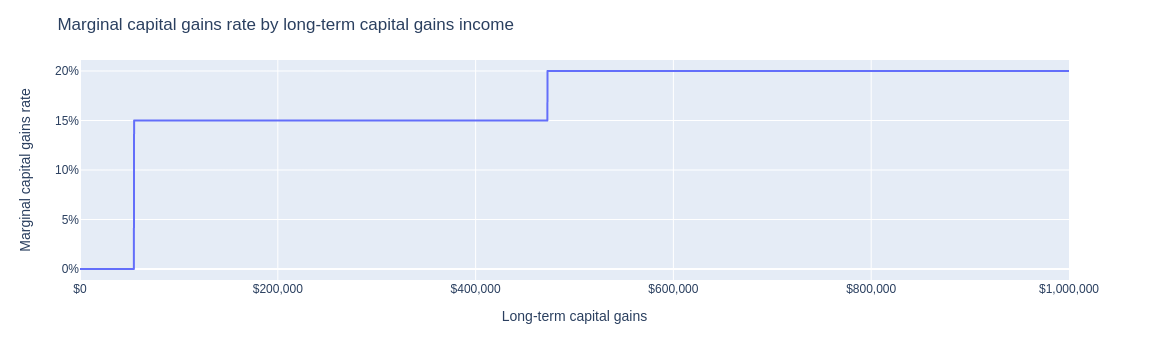

In [3]:
from policyengine_us import IndividualSim
import plotly.express as px
import pandas as pd

sim = IndividualSim()

sim.add_person(age=30, name="person")
sim.add_household(members=["person"], zip_code="01001")

sim.vary("long_term_capital_gains", max=1_000_000)

df = pd.DataFrame(
    {
        "Long-term capital gains": sim.calc("long_term_capital_gains")[0],
        "Marginal capital gains rate": sim.deriv(
            "capital_gains_tax", wrt="long_term_capital_gains"
        ),
    }
)

px.line(
    df, y="Marginal capital gains rate", x="Long-term capital gains"
).update_layout(
    title="Marginal capital gains rate by long-term capital gains income",
    yaxis_tickformat=".0%",
    xaxis_tickformat="$,",
)